In [1]:
# 1. Implement K-means by Numpy
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))
    
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return centers, labels, it

def visualize_kmeans(X, labels, centers, k):
    for i in range(k):
      plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], s=100)

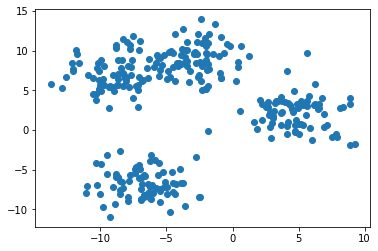

In [2]:
# 2
from sklearn.datasets import make_blobs

# create features and target
X, y = make_blobs(n_samples=300,
                  centers=4,
                  random_state=42,
                  cluster_std=2)

plt.scatter(X[:,0], X[:,1])

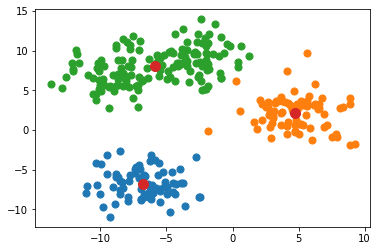

In [3]:

centers, labels, it = kmeans(X, 3)
visualize_kmeans(X, labels[-1], centers[-1], 3)

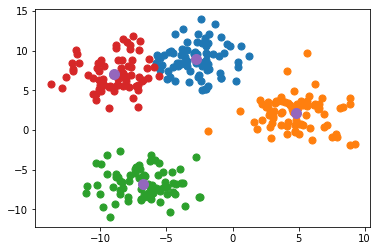

In [4]:
centers, labels, it = kmeans(X, 4)
visualize_kmeans(X, labels[-1], centers[-1], 4)

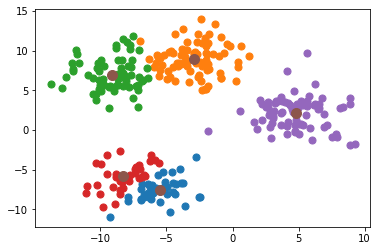

In [5]:
centers, labels, it = kmeans(X, 5)
visualize_kmeans(X, labels[-1], centers[-1], 5)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


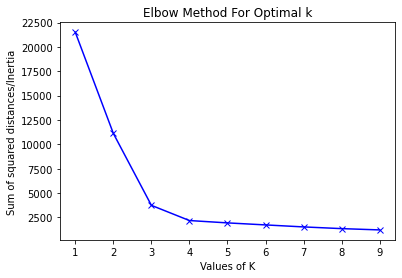

In [6]:
# 3
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

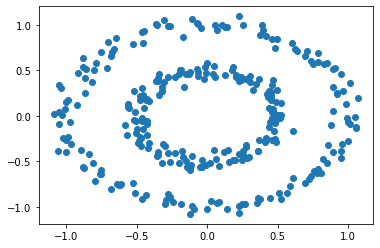

In [7]:
from sklearn.datasets import make_circles

X1, y1 = make_circles(
    n_samples=300, factor=0.5, noise=0.05, random_state=0
)
plt.scatter(X1[:, 0], X1[:, 1])
     